<a href="https://colab.research.google.com/github/svf5398/ParentPaper/blob/main/Child2017_Feature_Engineering_%26_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Child 2017 Dataset: Feature Engineering**

In [1]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import  LabelEncoder
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from numpy import set_printoptions
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv('Child-Data2017.csv', na_values='?')
for column in data.columns:
    if data[column].dtype == type(object):
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column].astype(str))
data.drop(['age_desc'] ,  axis = 1, inplace = True)
data.drop(['id'] ,  axis = 1, inplace = True)
data.replace("?",np.nan,inplace=True) #replace ? with nan

In [2]:
total_missing_data = data.isnull().sum().sort_values(ascending=False)
percent_of_missing_data = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat(
    [
        total_missing_data, 
        percent_of_missing_data
    ], 
    axis=1, 
    keys=['Total', 'Percent']
)
missing_data.head(10)

,Total,Percent
age,4,1.369863
A2_Score,0,0.000000
relation,0,0.000000
result,0,0.000000
used_app_before,0,0.000000
contry_of_res,0,0.000000
austim,0,0.000000
jundice,0,0.000000
ethnicity,0,0.000000
gender,0,0.000000


# Missing Data mean value or dropna():

In [3]:
data.loc[(data['age'].isnull())]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
32,1,0,0,1,0,1,1,1,1,1,NaN,1,10,0,0,13,0,7,4,1
65,0,0,1,0,0,0,0,0,0,0,NaN,1,4,0,0,24,0,1,1,0
126,1,1,1,1,0,1,0,1,0,1,NaN,1,10,1,0,24,0,7,4,1
138,0,1,1,0,1,1,1,1,0,0,NaN,1,10,1,0,39,1,6,4,0


In [4]:
data.age[32]=data.age.median()
data.age[65]=data.age.median()
data.age[126]=data.age.median()
data.age[138]=data.age.median()
data.loc[(data['age'].isnull())]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD


# ANOVA

In [5]:
X_Feature = data.iloc[:,0:19]  #independent columns
Y_Feature = data.iloc[:,19]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeaturesANOVA = SelectKBest(score_func=f_classif, k=10)
fitANOVA = bestfeaturesANOVA.fit(X_Feature,Y_Feature)
# summarize scores
set_printoptions(precision=3)
dfscores = pd.DataFrame(fitANOVA.scores_)
dfcolumns = pd.DataFrame(X_Feature.columns)
#concat two dataframes for better visualization 
ANOVAfeatureScores = pd.concat([dfcolumns,dfscores],axis=1)
ANOVAfeatureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(ANOVAfeatureScores )

            Feature       Score
0          A1_Score   53.141947
1          A2_Score   16.056199
2          A3_Score   53.787686
3          A4_Score  138.483811
4          A5_Score   48.900964
5          A6_Score   61.138658
6          A7_Score   23.529810
7          A8_Score   68.993060
8          A9_Score   89.757345
9         A10_Score   69.600217
10              age    1.650605
11           gender    0.436834
12        ethnicity    0.091082
13          jundice    0.182080
14           austim    0.692273
15    contry_of_res    0.243441
16  used_app_before    0.647843
17           result  672.421793
18         relation    4.736193


In [6]:
print('Univariate Selection using ANOVA')
print(ANOVAfeatureScores.nlargest(15,'Score'))  #print 15 best features

Univariate Selection using ANOVA
            Feature       Score
17           result  672.421793
3          A4_Score  138.483811
8          A9_Score   89.757345
9         A10_Score   69.600217
7          A8_Score   68.993060
5          A6_Score   61.138658
2          A3_Score   53.787686
0          A1_Score   53.141947
4          A5_Score   48.900964
6          A7_Score   23.529810
1          A2_Score   16.056199
18         relation    4.736193
10              age    1.650605
14           austim    0.692273
16  used_app_before    0.647843


# Chi

In [7]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fitChi = bestfeatures.fit(X_Feature,Y_Feature)
dfscores = pd.DataFrame(fitChi.scores_)
dfcolumns = pd.DataFrame(X_Feature.columns)
#concat two dataframes for better visualization 
ChifeatureScores = pd.concat([dfcolumns,dfscores],axis=1)
ChifeatureScores.columns = ['Feature','Score']  #naming the dataframe columns
ChifeatureScores

,Feature,Score
0,A1_Score,16.570951
1,A2_Score,7.134778
2,A3_Score,11.734209
3,A4_Score,42.338541
4,A5_Score,10.821959
5,A6_Score,14.625696
6,A7_Score,8.630529
7,A8_Score,28.251186
8,A9_Score,34.980461
9,A10_Score,15.483910


In [8]:
print('Univariate Selection using chi')
print(ChifeatureScores.nlargest(15,'Score'))  #print 15 best features

Univariate Selection using chi
            Feature       Score
17           result  170.110548
3          A4_Score   42.338541
8          A9_Score   34.980461
7          A8_Score   28.251186
0          A1_Score   16.570951
9         A10_Score   15.483910
5          A6_Score   14.625696
2          A3_Score   11.734209
4          A5_Score   10.821959
6          A7_Score    8.630529
1          A2_Score    7.134778
18         relation    4.047946
15    contry_of_res    2.461490
10              age    1.431854
16  used_app_before    0.626338


# Correlation

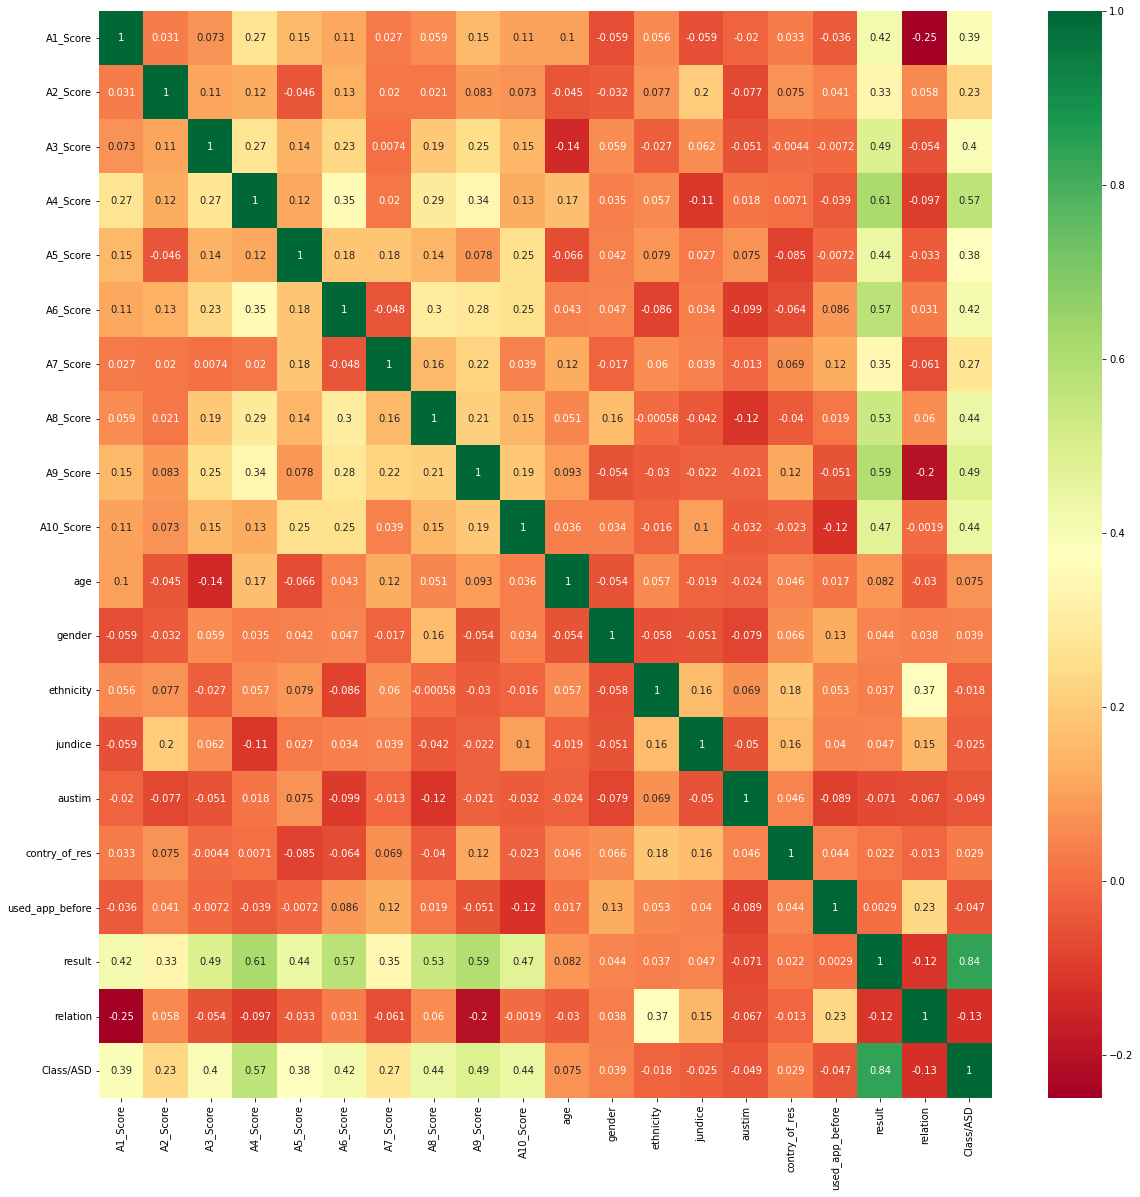

In [9]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# **Child 2017 Dataset: Model**



In [11]:
import time
import seaborn as sns
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import  LabelEncoder
import pandas as pd
import numpy as np

data = pd.read_csv('Child-Data2017.csv', na_values='?')
data.rename(columns={'Class/ASD': 'class'}, inplace=True)

for column in data.columns:
    if data[column].dtype == type(object):
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column].astype(str))

names = []
models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier()))

X=data[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']]
Y=data['class']

start_time = 0
elapsed_time = 0
confusion=0
pred=0

# Cross Validation

In [12]:
seed = 7
kfold = KFold(n_splits=10) # removed parameter "random state=seed" because it gave an error. Removing parameter did not affect output
for name, m in models:
    start_time = time.time()
    pred = cross_val_predict(m, X,Y, cv=kfold )
    elapsed_time = time.time() - start_time   
    confusion = metrics.confusion_matrix(Y,pred)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    specificity = TN / (TN + FP)
    sensitivity = TP / float(FN + TP)
    error = (FP + FN) / float(TP + TN + FP + FN) # equal #error_rate = 1 - accuracy
    F1Score = f1_score(Y, pred, average='binary')
    AUC=metrics.roc_auc_score(Y, pred)
    print(name)
    print('%.4f' % elapsed_time)
    print('%.4f' % float(accuracy *100.0))
    print('%.4f' %float(specificity*100.0))
    print('%.4f' %float(sensitivity*100.0))
    print('%.4f' %float(AUC*100.0))
    print('%.4f' %float(F1Score*100.0))
    print('%.4f' %float(error*100.0))
    print(' =======================')      

LR
0.1694
100.0000
100.0000
100.0000
100.0000
100.0000
0.0000
LDA
0.0993
96.9178
94.0397
100.0000
97.0199
96.9072
3.0822
CART
0.0667
93.4932
92.7152
94.3262
93.5207
93.3333
6.5068
NB
0.0727
88.6986
94.0397
82.9787
88.5092
87.6404
11.3014
KNN
0.1229
91.7808
88.7417
95.0355
91.8886
91.7808
8.2192
SVM
0.1107
98.2877
99.3377
97.1631
98.2504
98.2079
1.7123
AB
1.6705
100.0000
100.0000
100.0000
100.0000
100.0000
0.0000
GBM
1.1342
93.4932
92.7152
94.3262
93.5207
93.3333
6.5068
RF
1.5942
94.1781
92.7152
95.7447
94.2300
94.0767
5.8219
ET
1.2410
92.8082
92.7152
92.9078
92.8115
92.5795
7.1918


# Leave

In [13]:
num_folds = 10
for name, m in models: 
    loocv = LeaveOneOut() 
    start_time=time.time()
    pred = cross_val_predict(m, X,Y, cv=loocv )
    elapsed_time = time.time() - start_time
    confusion = metrics.confusion_matrix(Y,pred)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    specificity = TN / (TN + FP)
    sensitivity = TP / float(FN + TP)
    F1Score = f1_score(Y, pred, average='binary')
    AUC=metrics.roc_auc_score(Y, pred)
    error = (FP + FN) / float(TP + TN + FP + FN)
    print(name)
    print('%.4f' % elapsed_time)
    print('%.4f' % float(accuracy *100.0))
    print('%.4f' %float(specificity*100.0))
    print('%.4f' %float(sensitivity*100.0))
    print('%.4f' %float(AUC*100.0))
    print('%.4f' %float(F1Score*100.0))
    print('%.4f' %float(error*100.0))
    print(' =======================') 

LR
4.3752
100.0000
100.0000
100.0000
100.0000
100.0000
0.0000
LDA
1.2960
97.2603
94.7020
100.0000
97.3510
97.2414
2.7397
CART
1.1251
94.1781
93.3775
95.0355
94.2065
94.0351
5.8219
NB
1.1422
90.4110
95.3642
85.1064
90.2353
89.5522
9.5890
KNN
1.4281
91.7808
88.7417
95.0355
91.8886
91.7808
8.2192
SVM
1.7275
97.9452
98.6755
97.1631
97.9193
97.8571
2.0548
AB
34.3541
100.0000
100.0000
100.0000
100.0000
100.0000
0.0000
GBM
23.3340
94.8630
94.0397
95.7447
94.8922
94.7368
5.1370
RF
46.1791
95.5479
95.3642
95.7447
95.5545
95.4064
4.4521
ET
35.0008
94.1781
93.3775
95.0355
94.2065
94.0351
5.8219


# Train Test Split

In [14]:
test_size = 0.3
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
for name, m in models:
    model = m
    start_time = time.time()
    model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    elapsed_time = time.time() - start_time
    confusion = metrics.confusion_matrix(Y_test,pred)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    specificity = TN / (TN + FP)
    sensitivity = TP / float(FN + TP)
    F1Score = f1_score(Y_test, pred, average='binary')
    AUC=metrics.roc_auc_score(Y_test, pred)
    class_error = (FP + FN) / float(TP + TN + FP + FN)
    print(name)
    print('%.4f' % elapsed_time)
    print('%.4f' % float(accuracy *100.0))
    print('%.4f' %float(specificity*100.0))
    print('%.4f' %float(sensitivity*100.0))
    print('%.4f' %float(AUC*100.0))
    print('%.4f' %float(F1Score*100.0))
    print('%.4f' %float(class_error*100.0))
    print(' ====')

LR
0.0142
100.0000
100.0000
100.0000
100.0000
100.0000
0.0000
 ====
LDA
0.0069
100.0000
100.0000
100.0000
100.0000
100.0000
0.0000
 ====
CART
0.0065
87.5000
83.3333
92.5000
87.9167
87.0588
12.5000
 ====
NB
0.0080
88.6364
85.4167
92.5000
88.9583
88.0952
11.3636
 ====
KNN
0.0085
88.6364
79.1667
100.0000
89.5833
88.8889
11.3636
 ====
SVM
0.0049
94.3182
91.6667
97.5000
94.5833
93.9759
5.6818
 ====
AB
0.0847
100.0000
100.0000
100.0000
100.0000
100.0000
0.0000
 ====
GBM
0.0792
93.1818
87.5000
100.0000
93.7500
93.0233
6.8182
 ====
RF
0.1596
93.1818
89.5833
97.5000
93.5417
92.8571
6.8182
 ====
ET
0.1277
93.1818
93.7500
92.5000
93.1250
92.5000
6.8182
 ====
